# **Exploratory Data Analysis Notebook**

### In this notebook we will look to discover and view trends in our data and plot to visualize.  We will also continue to organize and prepare the data for the notebooks ahead.

#### Let's begin this notebook by reading in our revised dataframe from the main file used previously.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(f'/Users/ryanm/Desktop/df.csv')
print(df.shape)
df.head(10)

(3214874, 14)


,user_id,order_number,product_name,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department
0,1,1,XL Pick-A-Size Paper Towel Rolls,2539329,2,8,11.0,26405,5,0,54,17,paper goods,household
1,1,2,Aged White Cheddar Popcorn,2398795,3,7,15.0,26088,6,1,23,19,popcorn jerky,snacks
2,1,3,Creamy Almond Butter,473747,3,12,21.0,30450,5,1,88,13,spreads,pantry
3,1,4,XL Pick-A-Size Paper Towel Rolls,2254736,4,7,29.0,26405,5,1,54,17,paper goods,household
4,1,5,Bartlett Pears,431534,4,15,28.0,41787,8,1,24,4,fresh fruits,produce
5,1,6,Organic String Cheese,3367565,2,7,19.0,25133,4,1,21,16,packaged cheese,dairy eggs
6,1,7,Organic String Cheese,550135,1,9,20.0,25133,5,1,21,16,packaged cheese,dairy eggs
7,1,8,Organic Half & Half,3108588,1,14,14.0,49235,6,1,53,16,cream,dairy eggs
8,1,9,Organic Half & Half,2295261,1,16,0.0,49235,6,1,53,16,cream,dairy eggs
9,1,10,Zero Calorie Cola,2550362,4,8,30.0,46149,9,1,77,7,soft drinks,beverages


#### Before starting the plots, let's convert some of our cat (categorical type) columns to coded columns using cat codes.  This will help a lot when we go to plot so we can use those columns and gather more available insights.

In [3]:
df['product_name'] = df['product_name'].astype('category')
df['product_name_code'] = df['product_name'].cat.codes

df['aisle'] = df['aisle'].astype('category')
df['aisle_code'] = df['aisle'].cat.codes

df['department'] = df['department'].astype('category')
df['department_code'] = df['department'].cat.codes

df['department_code'].head()


0    11
1    20
2    16
3    11
4    19
Name: department_code, dtype: int8

#### Let's begin to look at some surface trends between some of our main features and plot them to see what that looks like so we can discover more about this dataset.

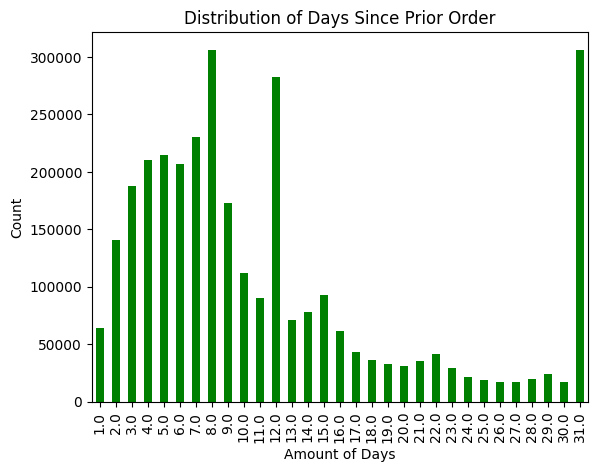

In [4]:
if df['days_since_prior_order'].min() == 0:
    df['days_since_prior_order'] += 1

df['days_since_prior_order'].value_counts().reindex(sorted(df['days_since_prior_order'].unique())).plot(kind='bar', color='green')
plt.xlabel('Amount of Days')
plt.ylabel('Count')
plt.title('Distribution of Days Since Prior Order')
plt.show()

#### So here we can see 3 clear values that stick out (8, 12, and 31), as well as a trend showing that most customers purchased again within the first week.

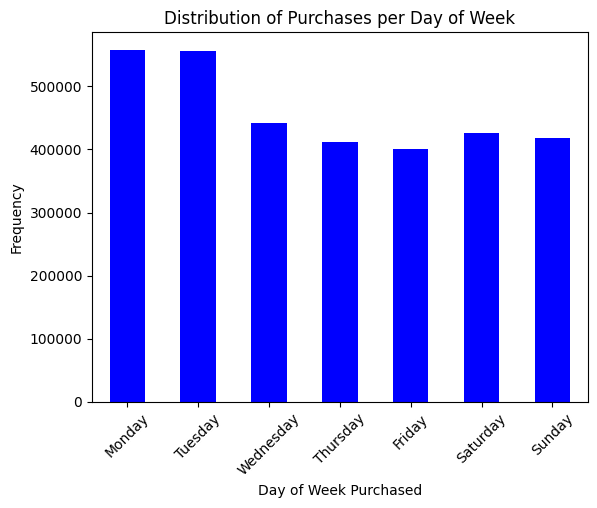

In [5]:
if df['order_dow'].min() == 0:
    df['order_dow'] += 1

day_mapping = {
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday',
    7 : 'Sunday'
}

df['order_dow'].map(day_mapping).value_counts().reindex(day_mapping.values()).plot(kind = 'bar', color = 'blue')
plt.xlabel('Day of Week Purchased')
plt.ylabel('Frequency')
plt.title('Distribution of Purchases per Day of Week')
plt.xticks(rotation = 45)
plt.show()



#### Interesting to see the most orders are placed on Monday and Tuesday of the week.

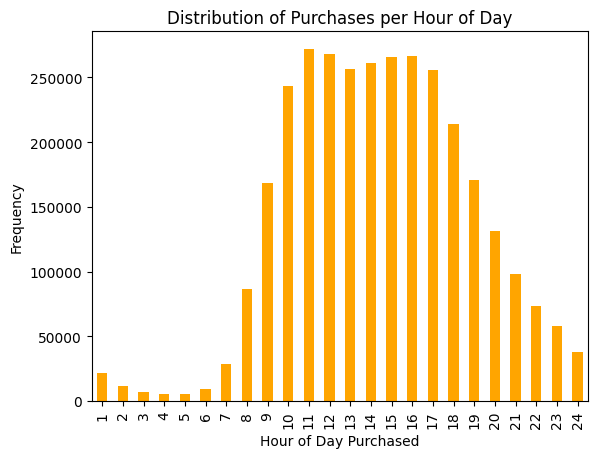

In [6]:
if df['order_hour_of_day'].min() == 0:
    df['order_hour_of_day'] += 1

df['order_hour_of_day'].value_counts().reindex(sorted(df['order_hour_of_day'].unique())).plot(kind = 'bar', color = 'orange')
plt.xlabel('Hour of Day Purchased')
plt.ylabel('Frequency')
plt.title('Distribution of Purchases per Hour of Day')
plt.show()

#### There's a noticeable pattern in purchase activity between 11am and 4pm.

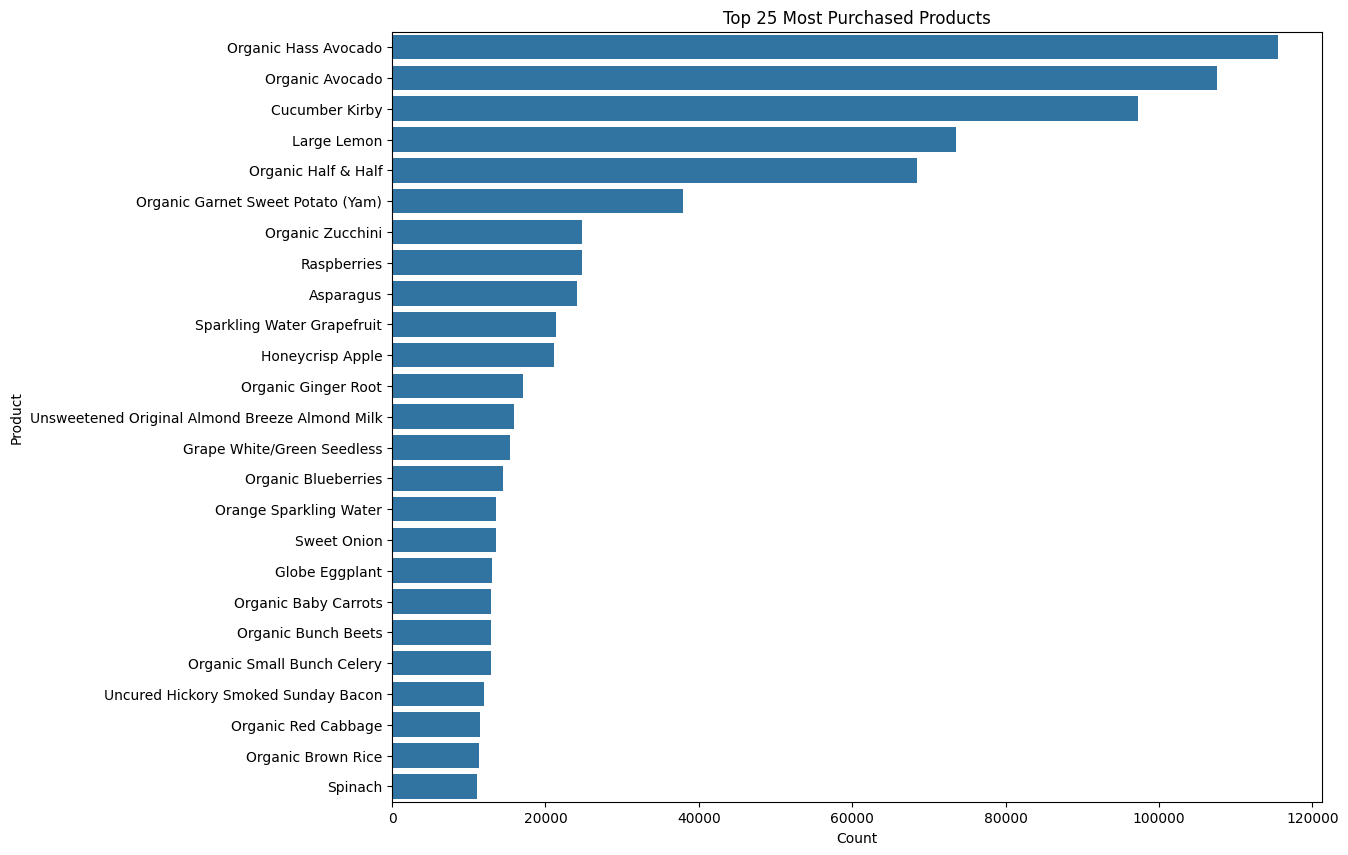

In [7]:
top_25_products = df['product_name'].value_counts().head(25)
top_25_p = df[df['product_name'].isin(top_25_products.index)]

plt.figure(figsize = (12,10))
sns.countplot(y = 'product_name', data = top_25_p, order = top_25_products.index)
plt.ylabel('Product')
plt.xlabel('Count')
plt.title('Top 25 Most Purchased Products')
plt.show()

#### The top 5 products take up the majority here, with both varieties of the avocado taking the top 2 spots.

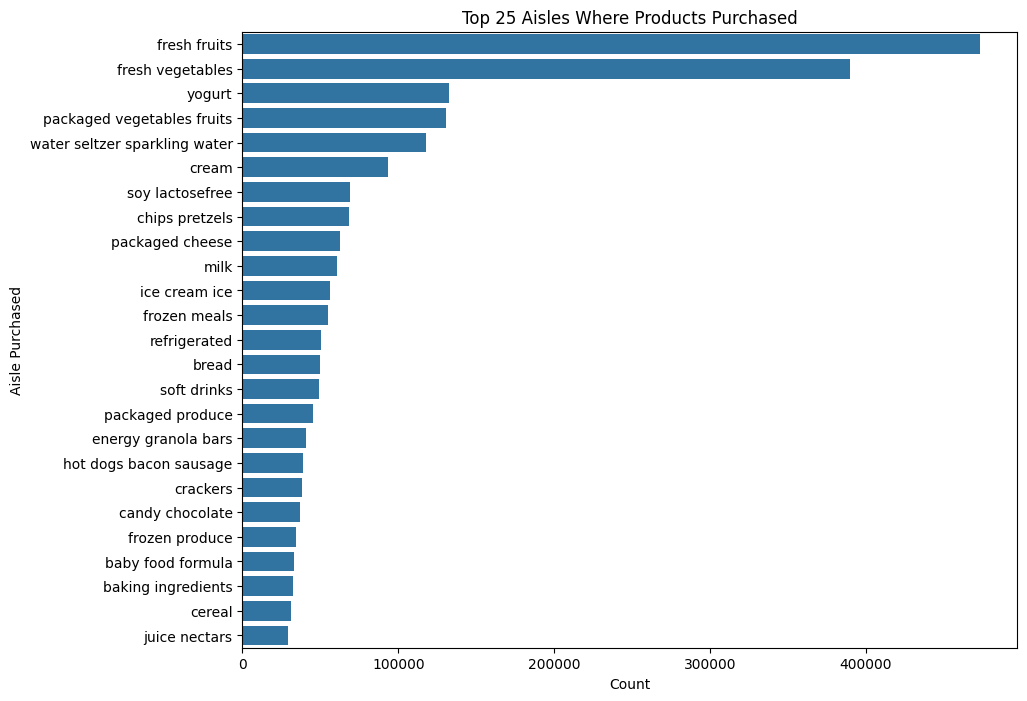

In [8]:
top_25_aisles = df['aisle'].value_counts().head(25)
top_25_a = df[df['aisle'].isin(top_25_aisles.index)]

plt.figure(figsize = (10,8))
sns.countplot(y = 'aisle', data = top_25_a, order = top_25_aisles.index)
plt.title('Top 25 Aisles Where Products Purchased')
plt.ylabel('Aisle Purchased')
plt.xlabel('Count')
plt.show()


#### Fresh fruits and fresh vegetables have a clear majority here.

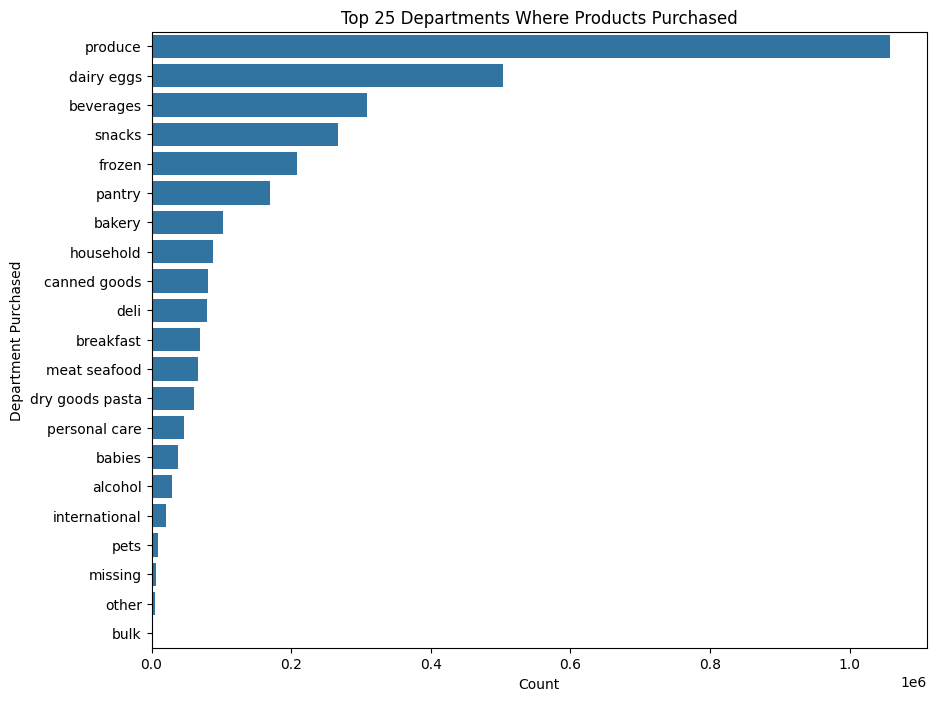

In [9]:
top_25_departments = df['department'].value_counts().head(25)
top_25_d = df[df['department'].isin(top_25_departments.index)]

plt.figure(figsize = (10,8))
sns.countplot(y = 'department', data = top_25_d, order = top_25_departments.index)
plt.ylabel('Department Purchased')
plt.xlabel('Count')
plt.title('Top 25 Departments Where Products Purchased')
plt.show()


#### Looks like produce has a clear margin, while dairy eggs is second.

#### Let's look at a few more plots regarding the day and hours features to see what else we can find.

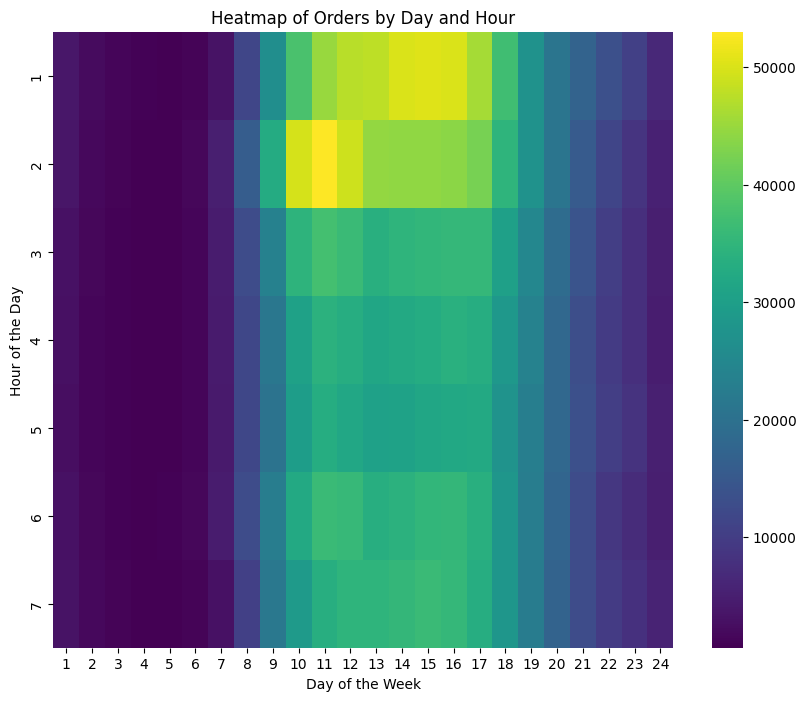

In [10]:
heatmap_data = df.pivot_table(index = 'order_dow', columns = 'order_hour_of_day', aggfunc = 'size', fill_value = 0)

plt.figure(figsize = (10,8))
sns.heatmap(heatmap_data, cmap = 'viridis')
plt.title("Heatmap of Orders by Day and Hour")
plt.ylabel("Hour of the Day")
plt.xlabel("Day of the Week")
plt.show()

#### As our two previous plots have suggested, the vast majority of orders takes place Monday during the day with the rest being completed Tuesdays before midday.

In [11]:
df['avg_orders'] = df.groupby(['order_dow', 'order_hour_of_day'])['order_id'].transform('size')

df.head()

,user_id,order_number,product_name,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,product_name_code,aisle_code,department_code,avg_orders
0,1,1,XL Pick-A-Size Paper Towel Rolls,2539329,3,9,12.0,26405,5,0,54,17,paper goods,household,31683,99,11,23488
1,1,2,Aged White Cheddar Popcorn,2398795,4,8,16.0,26088,6,1,23,19,popcorn jerky,snacks,980,103,20,11739
2,1,3,Creamy Almond Butter,473747,4,13,22.0,30450,5,1,88,13,spreads,pantry,7124,124,16,31580
3,1,4,XL Pick-A-Size Paper Towel Rolls,2254736,5,8,30.0,26405,5,1,54,17,paper goods,household,31683,99,11,11823
4,1,5,Bartlett Pears,431534,5,16,29.0,41787,8,1,24,4,fresh fruits,produce,2419,50,19,32095


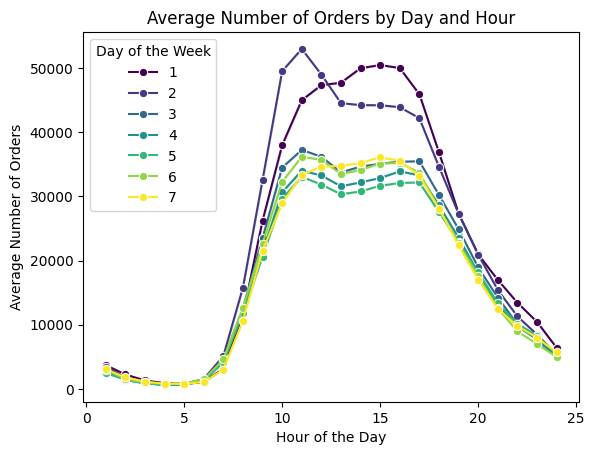

In [12]:
sns.lineplot(data = df, x = 'order_hour_of_day', y = 'avg_orders', hue = 'order_dow', palette = 'viridis', marker = 'o')
plt.title('Average Number of Orders by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Orders')
plt.legend(title = 'Day of the Week')
plt.show()

#### This plot above told us more of the same yet was a bit more clear in doing so, and we were able to add a nice feature in avg_orders to our dataframe.  Now let's see what adding in our user_id feature into the mix will show us.

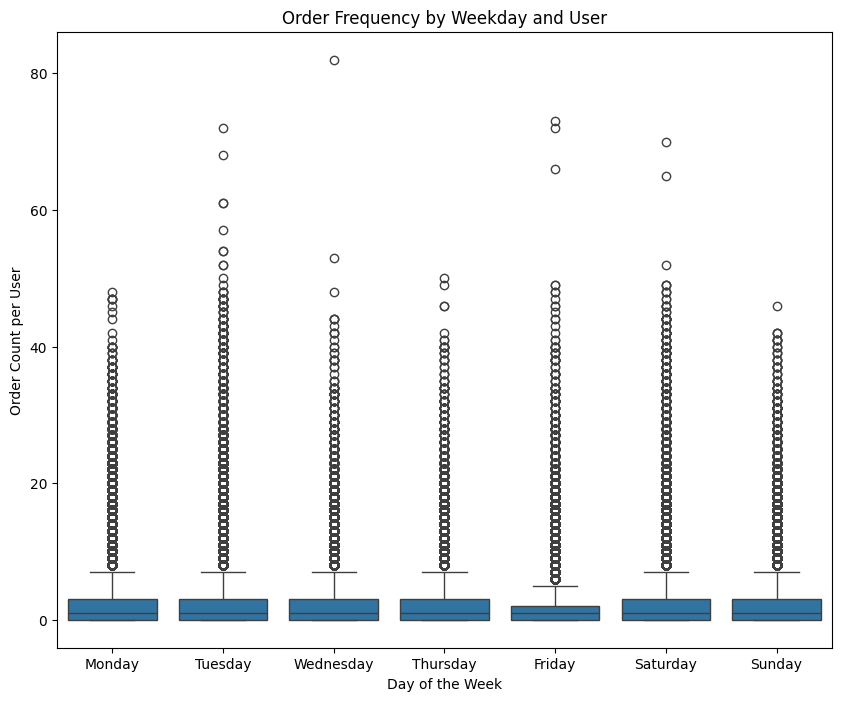

In [13]:
df['order_dow_name'] = df['order_dow'].map(day_mapping)
df['order_dow_name'] = pd.Categorical(df['order_dow_name'], categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered = True)


user_dow_orders = df.groupby(['user_id', 'order_dow_name']).size().reset_index(name = 'order_count')

plt.figure(figsize = (10,8))
sns.boxplot(data = user_dow_orders, x = 'order_dow_name', y = 'order_count')
plt.title("Order Frequency by Weekday and User")
plt.ylabel("Order Count per User")
plt.xlabel("Day of the Week")
plt.show()

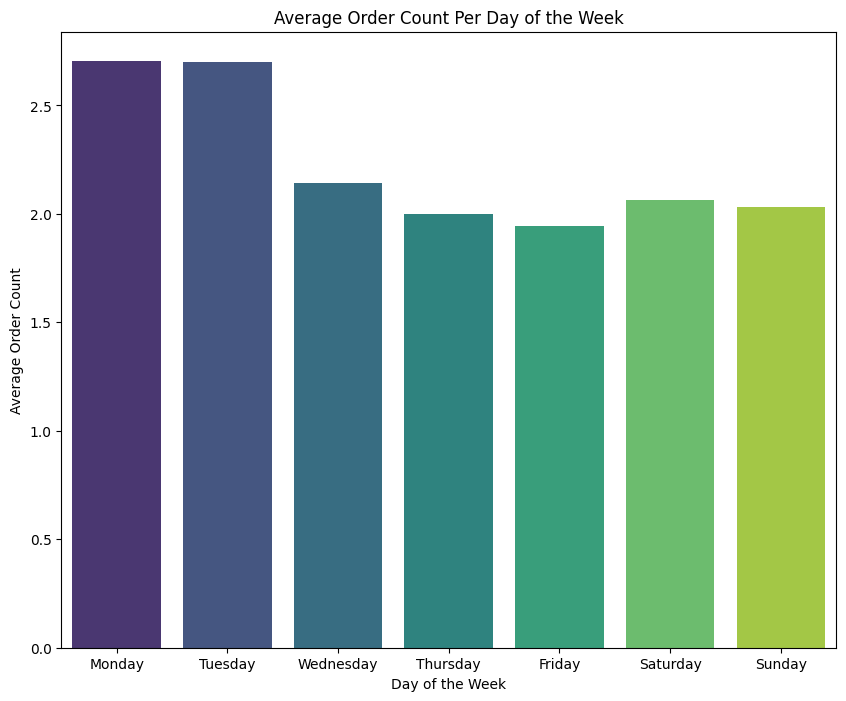

In [14]:
dow_avg_orders = user_dow_orders.groupby('order_dow_name')['order_count'].mean().reset_index()

plt.figure(figsize = (10,8))
sns.barplot(data = dow_avg_orders, x = 'order_dow_name', y = "order_count", palette = 'viridis')
plt.title("Average Order Count Per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Order Count")
plt.show()

#### Confirming again the order quantity gap disparity for Monday and Tuesday, this plot above shows it as well.  Let's keep going, this time making a FacetGrid to feed into our plots for more focused information about the customer data.

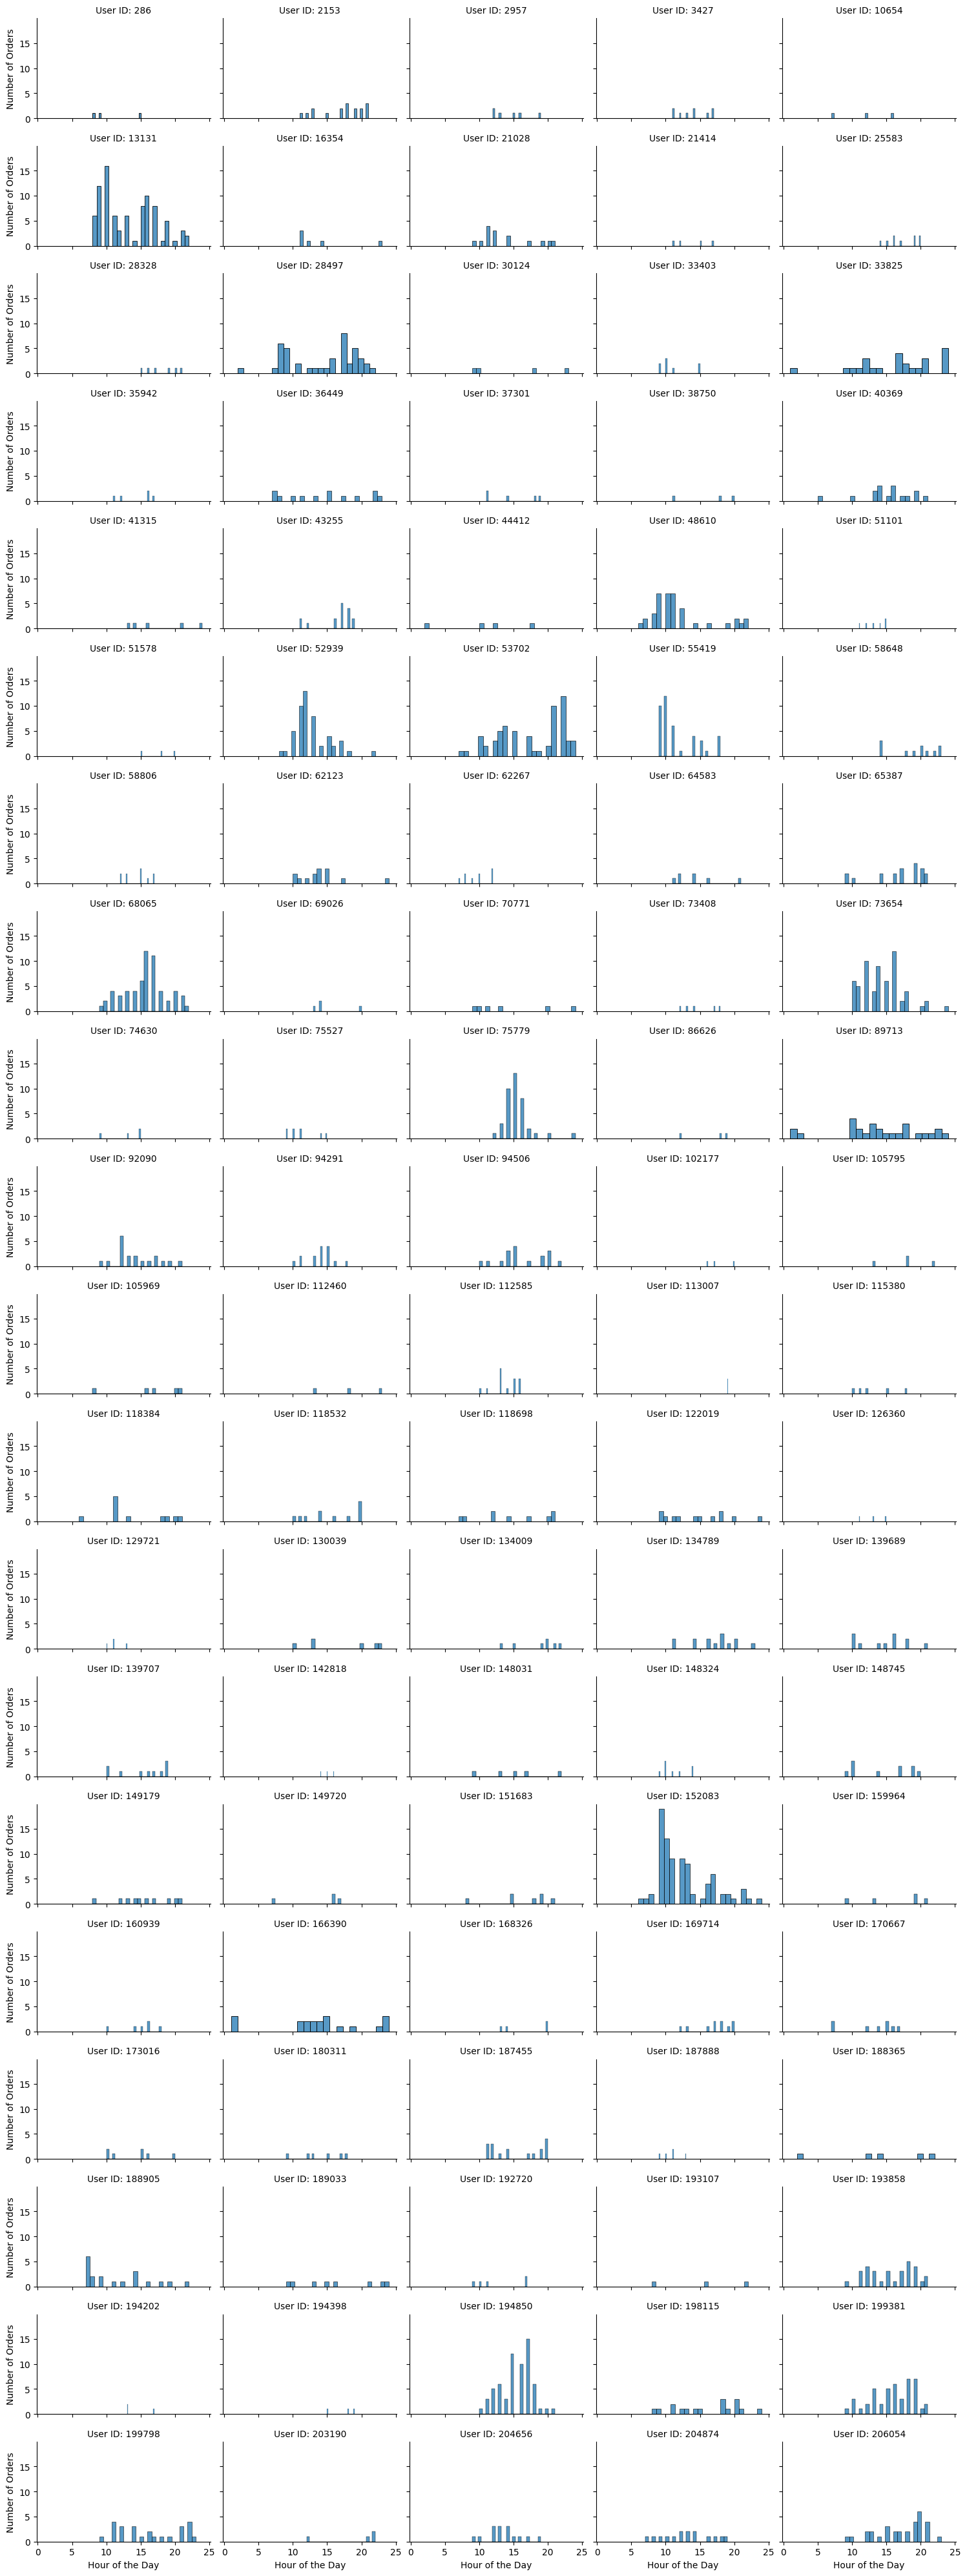

In [15]:
user_sample = df['user_id'].drop_duplicates().sample(n = 100, random_state = 42)
user_order = df[df['user_id'].isin(user_sample)]

fg = sns.FacetGrid(user_order, col = 'user_id', col_wrap = 5, height = 2, aspect = 1.5)

fg.map(sns.histplot, 'order_hour_of_day', bins = 24, kde = False)
fg.set_axis_labels("Hour of the Day", "Number of Orders")
fg.set_titles("User ID: {col_name}")
plt.show()

#### This is pretty neat, see here we can see overall purchase activity for each of our sampled users.  We can start to see that there are multiple different customer "groups" that can be viewed based on their purchase activity.  It may be prudent to explore this further, but for right now let's continue to plot some more with our FacetGrid object we created.

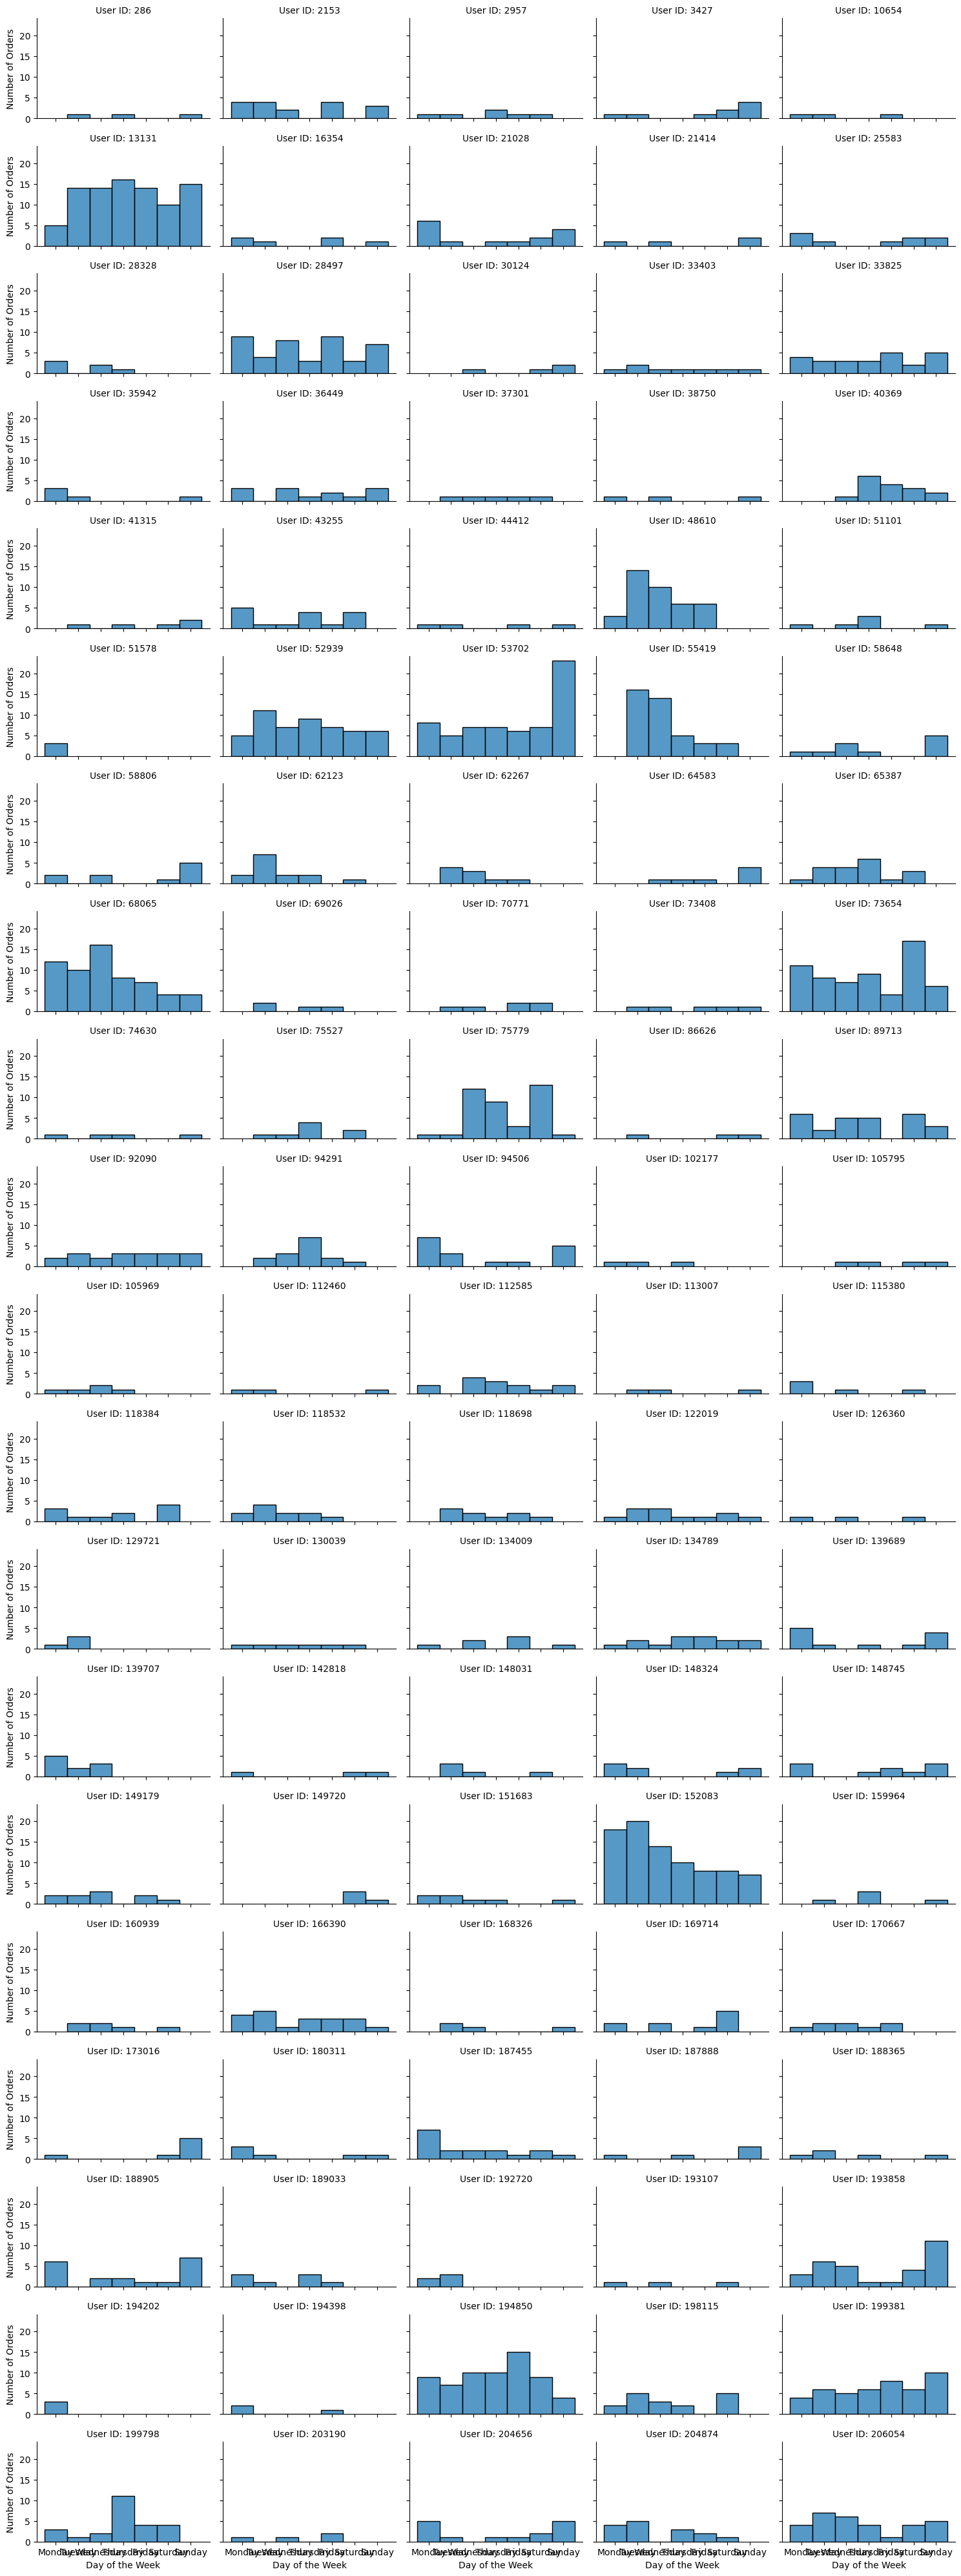

In [16]:
user_sample = df['user_id'].drop_duplicates().sample(n = 100, random_state = 42)
user_order = df[df['user_id'].isin(user_sample)]

fg = sns.FacetGrid(user_order, col = 'user_id', col_wrap = 5, height = 2, aspect = 1.5)

fg.map(sns.histplot, 'order_dow_name', kde=False, discrete = True)

fg.set_axis_labels('Day of the Week', 'Number of Orders')
fg.set_titles('User ID: {col_name}')

plt.show()

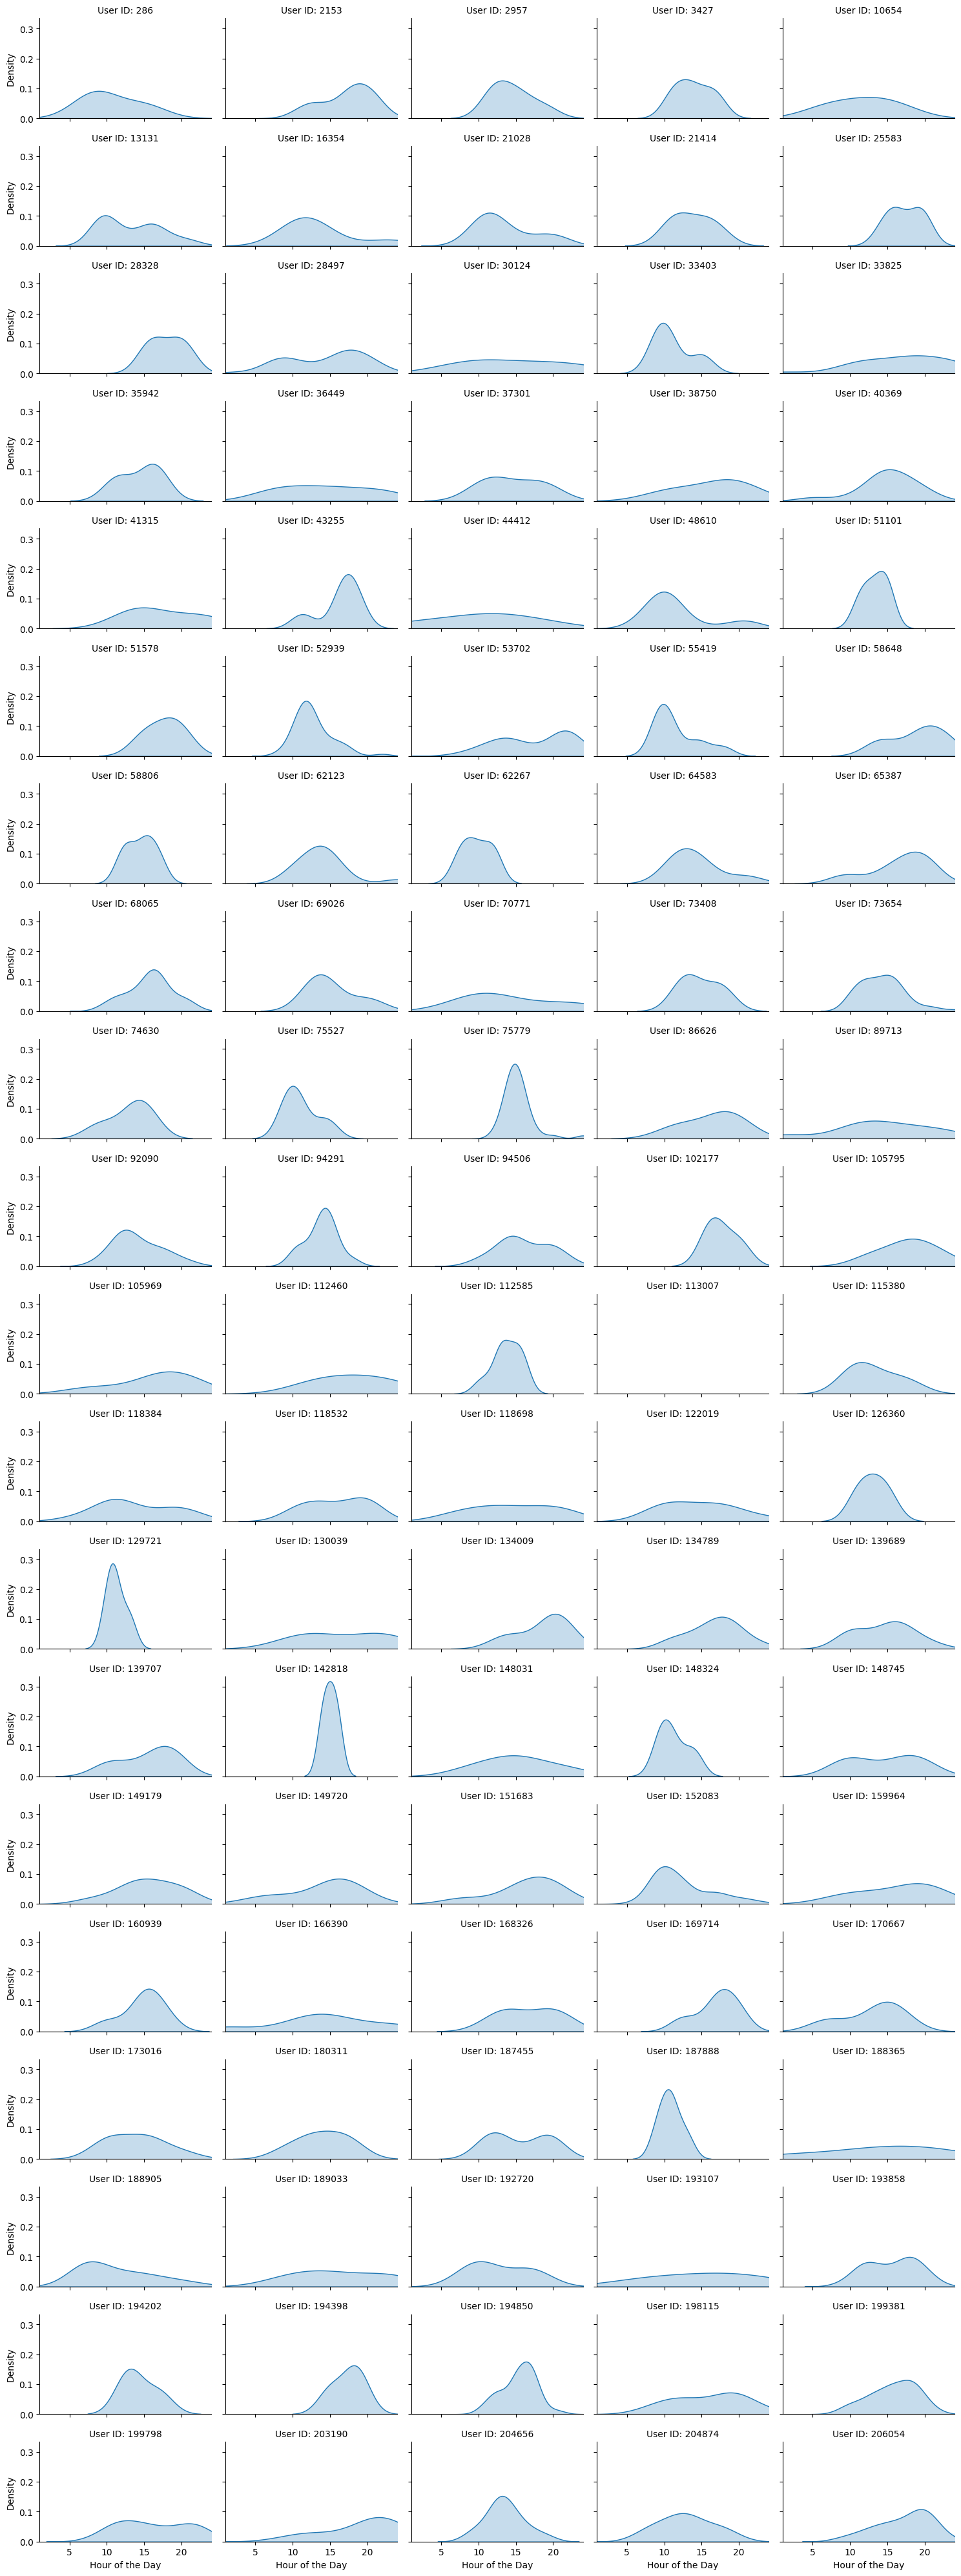

In [17]:
user_sample = df['user_id'].drop_duplicates().sample(n = 100, random_state = 42)
user_order = df[df['user_id'].isin(user_sample)]

fg = sns.FacetGrid(user_order, col = 'user_id', col_wrap = 5, height = 2, aspect = 1.5)

fg.map(sns.kdeplot, 'order_hour_of_day', fill = True)

fg.set_axis_labels('Hour of the Day', 'Density')
fg.set_titles('User ID: {col_name}')

for ax in fg.axes.flat:
    ax.set_xlim(1,24)

plt.show()

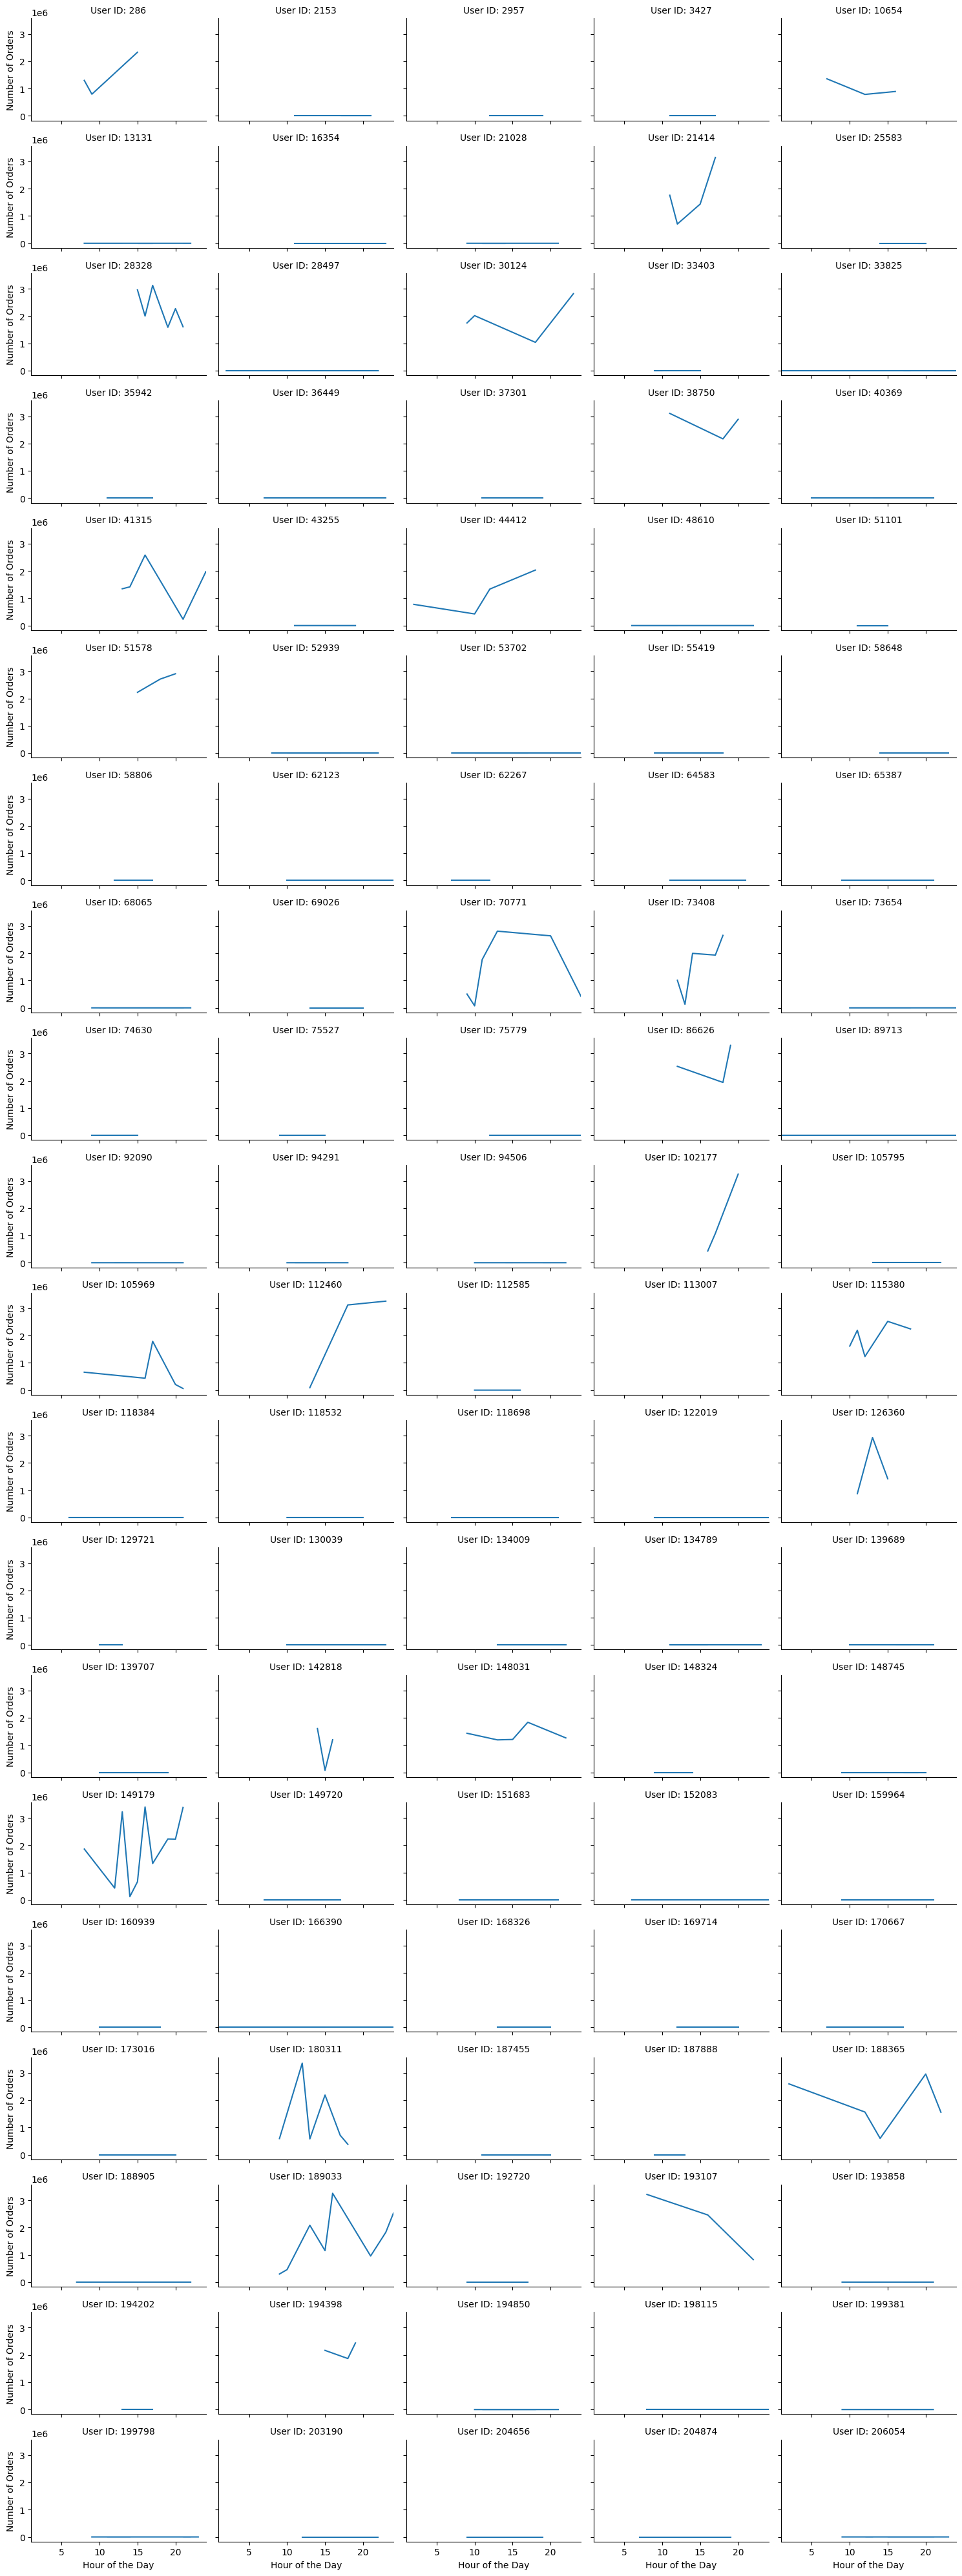

In [18]:
user_sample = df['user_id'].drop_duplicates().sample(n = 100, random_state = 42)
user_order = df[df['user_id'].isin(user_sample)]

fg = sns.FacetGrid(user_order, col = 'user_id', col_wrap = 5, height = 2, aspect = 1.5)

fg.map(sns.lineplot, 'order_hour_of_day', 'order_id', estimator = len)

fg.set_axis_labels('Hour of the Day', 'Number of Orders')
fg.set_titles('User ID: {col_name}')

for ax in fg.axes.flat:
    ax.set_xlim(1,24)

plt.show()

#### These last few plots have shown us some pretty interesting trends in just using a sample of the users from our data.  Let's see if we can show the data as a time series before we move on.

#### Since we don't have true datetime data we will have to create synthetic date data for the time series to work.

In [23]:
base_date = pd.to_datetime('01-01-2024')

df_date = df[['user_id', 'order_dow', 'order_hour_of_day']]

df_date['ts_date'] = df_date.apply(lambda row: base_date + pd.Timedelta(days = row['order_dow']) + pd.Timedelta(hours=row['order_hour_of_day']), axis = 1)

print(df_date[['user_id', 'order_dow', 'order_hour_of_day', 'ts_date']].head())

   user_id  order_dow  order_hour_of_day             ts_date
0        1          3                  9 2024-01-04 09:00:00
1        1          4                  8 2024-01-05 08:00:00
2        1          4                 13 2024-01-05 13:00:00
3        1          5                  8 2024-01-06 08:00:00
4        1          5                 16 2024-01-06 16:00:00


In [31]:
ts_data = df_date.groupby(['ts_date', 'user_id']).size().reset_index(name = 'order_count')

ts_data.set_index('ts_date', inplace = True)

print(ts_data.head())

                     user_id  order_count
ts_date                                  
2024-01-02 01:00:00       38            1
2024-01-02 01:00:00      101            1
2024-01-02 01:00:00      162            1
2024-01-02 01:00:00      204            1
2024-01-02 01:00:00      212            1


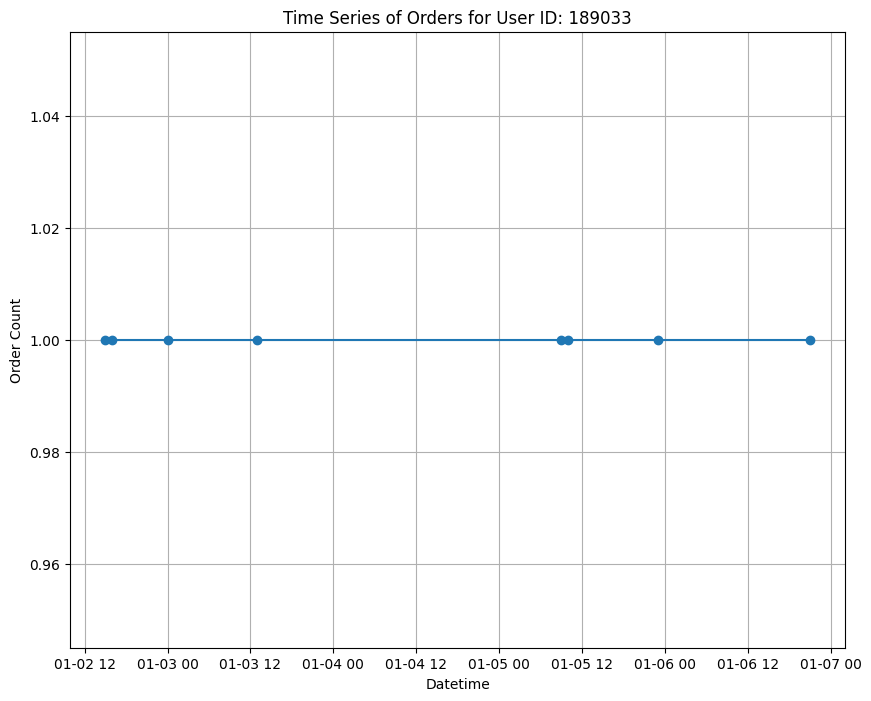

In [34]:
user_sample = df['user_id'].drop_duplicates().sample(n = 100, random_state = 42)

viz_users = user_sample.sample(n = 10, random_state = 42)

for user_id in viz_users:
    user_sample = ts_data[ts_data['user_id'] == user_id]

plt.figure(figsize = (10,8))
plt.plot(user_sample.index, user_sample['order_count'], marker = 'o')
plt.title(f'Time Series of Orders for User ID: {user_id}')
plt.xlabel('Datetime')
plt.ylabel('Order Count')
plt.grid(True)
plt.show()

In [33]:
user_sample.head()

,user_id,order_count
ts_date,,
2024-01-02 15:00:00,189033,1
2024-01-02 16:00:00,189033,1
2024-01-03 00:00:00,189033,1
2024-01-03 13:00:00,189033,1
2024-01-05 09:00:00,189033,1


In [36]:
main_path = r'C:/Users/ryanm/Desktop/df-mod.csv'

df_mod = df
df_mod.to_csv(main_path, index = False)